In [4]:
import altair as alt
from dash import Dash, dcc, html, Input, Output
from vega_datasets import data

    
cars = data.cars()

def plot_altair(xmax):
    chart = alt.Chart(cars[cars['Horsepower'] < xmax]).mark_point().encode(
        x='Horsepower',
        y='Weight_in_lbs')
    return chart.to_html()

app = Dash(__name__, external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])

app.layout = html.Div([
        html.Iframe(
            id='scatter',
            srcDoc=plot_altair(xmax=0),
            style={'border-width': '0', 'width': '100%', 'height': '400px'}),
        dcc.Slider(id='xslider', min=0, max=240)])
        
@app.callback(
    Output('scatter', 'srcDoc'),
    Input('xslider', 'value'))
def update_output(xmax):
    return plot_altair(xmax)

if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [6]:
import altair as alt
from dash import Dash, dcc, html, Input, Output
from vega_datasets import data

    
cars = data.cars()
print(cars.columns)
cars


Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
      dtype='object')


,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


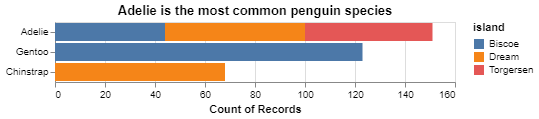

In [2]:
# Run this setup cell before starting, but don't modify any code here
import altair as alt
import pandas as pd
# Display plots as interactive HTML locally and as static images on Gradescope
alt.renderers.enable('mimetype')
penguins = pd.read_csv('data/penguins.csv')
#penguins

bar_species_count = alt.Chart(penguins, title='Adelie is the most common penguin species').mark_bar().encode(
    x=alt.X('count()'),
    y=alt.Y('species', sort='-x',title=''),
    color='island'
)
bar_species_count

In [7]:
from dash import Dash, html, dcc, Input, Output
import altair as alt
import pandas as pd

# Read in global data
#cars = data.cars()
penguins = pd.read_csv('data/penguins.csv')


# Setup app and layout/frontend
app = Dash(__name__,  external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])
app.layout = html.Div([
    html.Iframe(
        id='scatter',
        style={'border-width': '0', 'width': '100%', 'height': '400px'}),
    dcc.Dropdown(
        #id='xcol-widget',
        id='island_dropdown',
        #value='island',  # REQUIRED to show the plot on the first page load
        #options=[{'label': col, 'value': col} for col in penguins.columns])])
        options=[{'label': 'Island_Name', 'value': 'island'}])

# Set up callbacks/backend
@app.callback(
    Output('scatter', 'srcDoc'),
    Input('island_dropdown', 'value'))
def plot_altair(island):
    #chart = alt.Chart(cars).mark_point().encode(
    #    x=xcol,
    #    y='Displacement',
    #    tooltip='Horsepower').interactive()
    bar_chart = alt.Chart(penguins, title='Adelie is the most common penguin species').mark_bar().encode(
        x=alt.X('count()'),
        y=alt.Y('species', sort='-x',title=''),
        color=island)
    
    return bar_chart.to_html()

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
